In [304]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.discriminant_analysis import StandardScaler
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import datasets


# Projet ANDO

## Projection Orthogonale

**Définition** :

Soit $\mathcal{E}$ un espace vecteuriel de dimension $p$. Si $\mathcal{D}$ est une droite vecteurielle engendrée par le vecteur $\vec{a}$ qui passe par un point $Q$ de $\mathbb{R}^p$, l'ensemble des vecteurs orthogonaux à $\mathcal{D}$ est un hyperplan appelé hyperplan normal à $\mathcal{D}$ et défini par : 

$$
\mathcal{D}^{\perp} =  \left\{ \vec{h} \in \mathbb{R}^p \mid (\vec{h}\cdot \vec{a}) = 0 \right\}
$$


Si $x$ est un point arbitraire de $\mathbb{R}^p$ et si on note $\vec{x}$ le vecteur associé qui va de $Q$ à ce point, on peut toujours le décomposer de la façon suivante :

$$
\vec{x} = \vec{x}_{\mathcal{D}} + \vec{x}_{\perp}
\text{ avec }
\vec{x}_{\mathcal{D}} = \frac{(\vec{x} \cdot \vec{a})}{\|a\|^2}\vec{a}
$$

Si on note $x_{\mathcal{D}}$ la projection du point sur la droite $\mathcal{D}$ et si on note $x_i$ la ième composante du point $x$, on obtient alors les coordonnées du point $x_{\mathcal{D}}$:

$$
\forall i \in [1;p], x_{\mathcal{D}_i} =  Q_{i} + \frac{\sum_{k=1}^{p} (x_{k} - Q_{k}) * a_{k}}{\|a\|^2} * a_{i}
$$

Pour avoir la distance entre le point $x$ et la droite $\mathcal{D}$, on a besoin de:

$$
\|\vec{x}_{\perp} \| = \|(x_1 - x_{\mathcal{D}_1},\  x_2 - x_{\mathcal{D}_2}, \ ..., \ x_p - x_{\mathcal{D}_p}) \|
$$

Dans la suite de ce document, on choisira de représenter une droite dans $\mathbb{R}^p$ par un de ses vecteurs directeurs unitaires, noté $\vec{u}$.

In [305]:
# Fonction pour la projection orthogonale d'un point sur une droite
# x: point à projeter
# u: vecteur directeur unitaire de la droite
# q: point de la droite
# retourne la projection orthogonale de x sur la droite
def projection_orthogonale(x, u, q):
    return np.dot(x - q, u) * u + q

# Fonction pour calculer la distance entre un point et sa projection orthogonale sur une droite
# x: un point de l'espace
# u: vecteur directeur unitaire de la droite
# q: point de la droite
# retourne la distance entre x et sa projection orthogonale sur la droite
def distance_projection(x, u, q):
    projection = projection_orthogonale(x, u, q)
    return np.linalg.norm(x - projection)

In [306]:
class Point():
    def __init__(self, coordonnées: np.array):
        self.coordonnées = coordonnées

    def __repr__(self):
        return f"Point({self.coordonnées})"
    
    def dim(self):
        return self.coordonnées.shape[0]
    
class Droite():
    def __init__(self, point: Point, vecteur: np.array):
        if (point.dim() != vecteur.shape[0]):
            raise Exception("Le vecteur doit avoir la même dimension que le point", point.dim(), vecteur.shape[0])
        self.point = point
        self.vecteur = vecteur/np.linalg.norm(vecteur)

    def __repr__(self):
        return f"Droite(Passe par le point {self.point}, vecteur directeur {self.vecteur})"

    def projection_orthogonale(self, point: Point):
        if (point.dim() != self.vecteur.shape[0]):
           raise Exception("Le point doit avoir la même dimension que le vecteur directeur,", point.dim(), self.vecteur.shape[0])
        return projection_orthogonale(point.coordonnées, self.vecteur, self.point.coordonnées)

    def distance_projection(self, point: Point):
        if (point.dim() != self.vecteur.shape[0]):
            raise Exception("Le point doit avoir la même dimension que le vecteur directeur,", point.dim(), self.vecteur.shape[0])
        return distance_projection(point.coordonnées, self.vecteur, self.point.coordonnées)
    
    def afficher(self, ax):
        # Définir deux points pour tracer la droite
        point1 = self.point.coordonnées
        point2 = self.point.coordonnées + self.vecteur

        # Tracer la droite
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], label=f"Droite {self.point} - {point2}")
    

In [307]:
# Fonction pour afficher la projection orthogonale d'un point sur une droite
# x: point à projeter
# droite: droite de la projection 
def plot_projection_distance(x: Point, D: Droite):
    # Calculer la projection orthogonale
    projection = D.projection_orthogonale(x)
    
    # Créer un vecteur pour représenter la droite
    t = np.linspace(0, 5, 100)
    line = np.outer(t, D.vecteur) + D.point.coordonnées
    
    # Créer le graphique
    plt.figure(figsize=(8, 8))
    
    # Tracer la droite
    plt.plot(line[:, 0], line[:, 1], label='Droite D')
    
    # Tracer le point x
    plt.scatter(x.coordonnées[0], x.coordonnées[1], color='red', label='Point x')
    
    # Tracer la projection orthogonale
    plt.scatter(projection[0], projection[1], color='green', label='Projection orthogonale')
    
    # Tracer la ligne de distance
    plt.plot([x.coordonnées[0], projection[0]], [x.coordonnées[1], projection[1]], linestyle='--', color='blue', label='Distance')
    
    # Ajouter des étiquettes et une légende
    plt.text(x.coordonnées[0] + 0.2, x.coordonnées[1] + 0.2, 'point x', color='red')
    plt.text(projection[0] + 0.2, projection[1] - 0.2, 'Projection', color='green')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.axis('equal')
    plt.title('Projection orthogonale et distance entre un point et une droite')
    
    # Afficher le graphique
    plt.show()

#nbconvert

Coordonnées de la projection orthogonale: [-0.79802776  1.63075237]
Distance entre le point et la droite: 3.1150920360380336


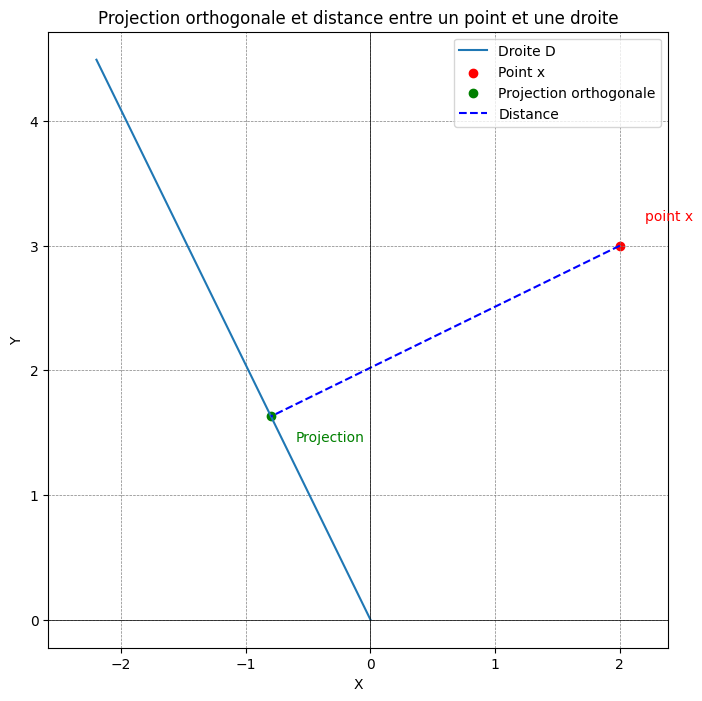

In [308]:
# Test de la fonction de projection orthogonale
x = Point(np.array([2, 3]))
D = Droite(Point(np.array([0,0])), np.array([-2.3, 4.7]))


# Calculer la projection orthogonale
projection = D.projection_orthogonale(x)
print("Coordonnées de la projection orthogonale:", projection)

# Calculer la distance entre le point et la droite
distance = D.distance_projection(x)
print("Distance entre le point et la droite:", distance)
plot_projection_distance(x, D)

In [309]:
# Fonction pour calculer la droite la plus proche d'un point
# x: un point de l'espace
# droites: un tableau de droites
# retourne le vecteur directeur de la droite la plus proche de x
def droite_plus_proche(x, droites):
    distances = [d.distance_projection(x) for d in droites]
    
    # Trouver l'indice de la droite la plus proche
    indice_plus_proche = np.argmin(distances)
    
    # Vérifier s'il y a des égalités de distance
    indices_egalite = np.where(distances == distances[indice_plus_proche])[0]
    
    # S'il y a des égalités, choisir aléatoirement parmi les droites équidistantes
    if len(indices_egalite) > 1:
        indice_plus_proche = np.random.choice(indices_egalite)
    
    return droites[indice_plus_proche], "Indice de la liste: {}".format(indice_plus_proche)

Distance entre le point et la droite: 3.1150920360380336


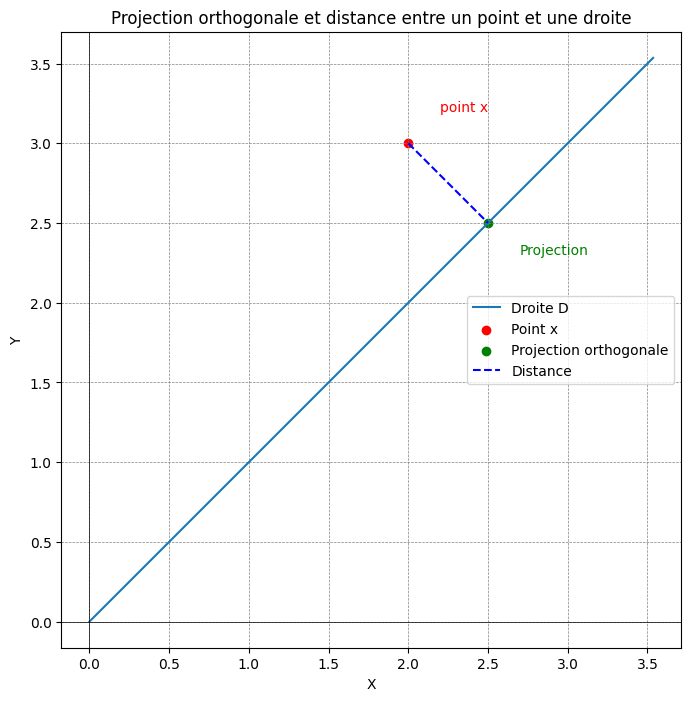

(Droite(Passe par le point Point([0 0]), vecteur directeur [0.70710678 0.70710678]), 'Indice de la liste: 1')


In [321]:
#Exemple avec deux droites
D2 = Droite(Point(np.array([0,0])), np.array([2, 2]))


# Calculer la distance entre le point et la droite
distance = D.distance_projection(x)
print("Distance entre le point et la droite:", distance)

plot_projection_distance(x, D2)
print(droite_plus_proche(x, [D, D2]))

Le programme a bien déterminé que D2 est la droite la plus proche du point.

# Les nuées dynamiques ou les kmeans généralisés

In [311]:
# Créer un ensemble de droites représentant les K classes initiales
def initialiser_representants(K, points):
    dimension = points[0].dim()
    N = len(points)
    ind = np.linspace(0, N-1, K, dtype=int)
    representants = np.array([])
    for k in range(K):
        representants = np.append(representants, Droite(points[ind[k]], np.random.randn(dimension))) 
    return representants

# on veut uniquement les vecteurs propres de la matrice de covariance
def comp_acp(X):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvecteurs = np.linalg.eigh(cov_matrix)
    # On trie les vecteurs propres par ordre décroissant des valeurs propres
    indices = np.argsort(eigenvalues)[::-1]
    eigenvecteurs = eigenvecteurs[:, indices]
    return eigenvecteurs


def kmeans_generalises(points, K, max_iterations=1000):
    # Initialisation des représentants (droites)
    representants = initialiser_representants(K, points)

    # Initialisation des classes précédentes
    prev_classes = np.zeros(len(points), dtype=int)

    for iteration in range(max_iterations):
        # Affectation des points aux classes
        distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Matrice de distances de dimension (N, K)
        classes = np.argmin(distances, axis=1)  # Vecteur de classes de dimension (N,)

        # Vérifier si les classes ont convergé
        if np.array_equal(classes, prev_classes):
            #print(f"Convergence atteinte à l'itération {iteration + 1}")
            break  # Arrêter l'algorithme

        prev_classes = np.copy(classes)  # Mettre à jour les classes précédentes

        # Mise à jour des représentants
        for k in range(K):
            ind_k = np.where(classes == k)[0]
            X_k = np.array([points[i].coordonnées for i in ind_k]) # Sous matrice des points de la classe k
            # Si la classe pssède au moins 2 points
            if X_k.shape[0] > 1:
                acp_k = comp_acp(X_k)
                representants[k] = Droite(Point(np.mean(X_k, axis=0)), acp_k[0])
            # Sinon on garde le même représentant

    distances = np.array([[representant.distance_projection(point) for representant in representants] for point in points]) # Matrice de distances de dimension (N, K)
    classes = np.argmin(distances, axis=1)  # Vecteur de classes de dimension (N,)

    
    return representants, classes

# Exemples test

Convergence atteinte à l'itération 2
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 4
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 2
Convergence atteinte à l'itération 2
Convergence atteinte à l'itération 3
Convergence atteinte à l'itération 3
Classe 1 - Représentant : Droite(Passe par le point Point([-0.77127911 -0.97615965]), vecteur directeur [-0.99983903 -0.01794212])
Classe 2 - Représentant : Droite(Passe par le point Point([0.77127911 0.97615965]), vecteur directeur [-0.99999174  0.00406506])


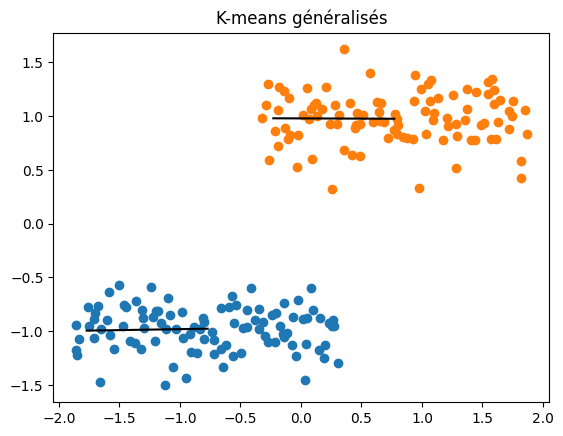

In [312]:
# Définir trois droites
def droite1(x):
    return 0

def droite2(x):
    return 10

# def droite3(x):
#     return x - 500

# Points autour de la première droite
X1, _ = make_blobs(n_samples=100, centers=[[i, droite1(i) + np.random.normal(0, 0.25)] for i in range(-100, 70)])

# Points autour de la deuxième droite
X2, _ = make_blobs(n_samples=100, centers=[[i, droite2(i) + np.random.normal(0, 0.25)] for i in range(-30, 100)])

# # Points autour de la troisième droite
# X3, _ = make_blobs(n_samples=100, centers=[[i, droite3(i) + np.random.normal(0, 0.25)] for i in range(-50, 50)])

# Concaténer les points pour former un ensemble de données
data = np.concatenate([X1, X2])

# Normaliser les données
data = StandardScaler().fit_transform(data)

# Appliquer l'algorithme des k-means généralisés 10 fois et choisir le résultat avec le moins d'erreur
K = 2

liste_representants = []
liste_classes = []
trueclass = np.concatenate([np.zeros(100), np.ones(100)])
for i in range(10):
    representants, classes = kmeans_generalises([Point(coord) for coord in data], K, max_iterations=100)
    liste_representants.append(representants)
    liste_classes.append(classes)
representants = liste_representants[np.argmin([np.sum(np.abs(classes - trueclass)) for classes in liste_classes])]
classes = liste_classes[np.argmin([np.sum(np.abs(classes - trueclass)) for classes in liste_classes])]


# Afficher les résultats
for i in range(K):
    print(f"Classe {i + 1} - Représentant : {representants[i]}")

# Afficher les points en couleur en fonction des classes
for k in range(K):
    ind_k = np.where(classes == k)[0]
    points_k = data[ind_k]
    plt.scatter(points_k[:, 0], points_k[:, 1], label=f'Classe {k + 1}')

# Afficher les droites des représentants
for i in range(K):
    droite = representants[i]

    # Tracer la droite
    direction = droite.vecteur
    origin = droite.point.coordonnées
    scale = 1
    end_point = origin + scale * direction
    plt.plot([origin[0], end_point[0]], [origin[1], end_point[1]], color='black')

# x_values = np.arange(20)
# plt.plot(x_values, [droite1(i) for i in x_values], color='red', linestyle='dashed', label='Droite 1 réelle')
# plt.plot(x_values, [droite2(i) for i in x_values], color='green', linestyle='dashed', label='Droite 2 réelle')
# plt.plot(x_values, [droite3(i) for i in x_values], color='blue', linestyle='dashed', label='Droite 3 réelle')

plt.title('K-means généralisés')
plt.show()

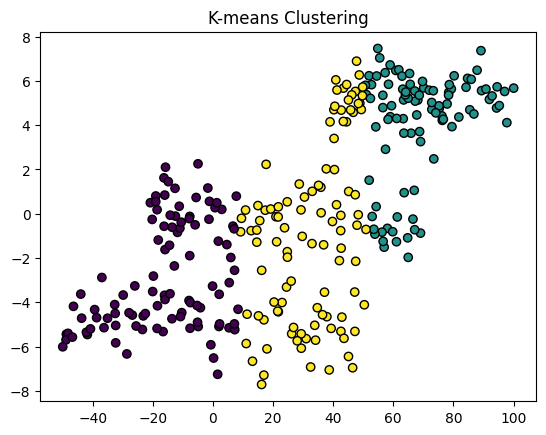

Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 8
Convergence atteinte à l'itération 7
Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 5
Convergence atteinte à l'itération 12
Convergence atteinte à l'itération 8
Classe 1 - Représentant : Droite(Passe par le point Point([-0.87788    -4.84342351]), vecteur directeur [-0.99998585 -0.00532055])
Classe 2 - Représentant : Droite(Passe par le point Point([20.94633972 -0.15142969]), vecteur directeur [-0.9999951  -0.00313198])
Classe 3 - Représentant : Droite(Passe par le point Point([65.33642635  5.22598511]), vecteur directeur [-0.99999746  0.00225526])


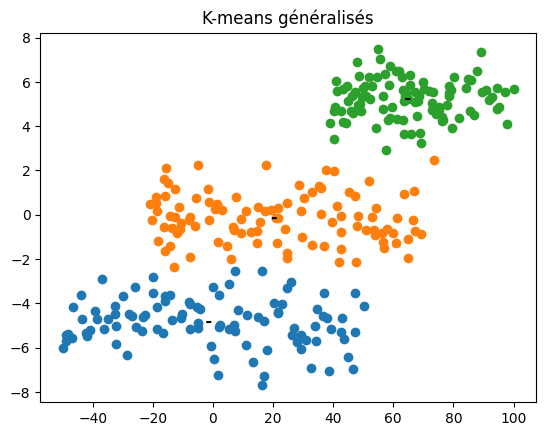

In [313]:
# Définir trois droites
def droite1(x):
    return -5

def droite2(x):
    return 0

def droite3(x):
    return 5

# Points autour de la première droite
X1, _ = make_blobs(n_samples=100, centers=[[i, droite1(i) + np.random.normal(0, 0.01)] for i in range(-50, 50)])

# Points autour de la deuxième droite
X2, _ = make_blobs(n_samples=100, centers=[[i, droite2(i) + np.random.normal(0, 0.01)] for i in range(-20, 70)])

# Points autour de la troisième droite
X3, _ = make_blobs(n_samples=100, centers=[[i, droite3(i) + np.random.normal(0, 0.01)] for i in range(40, 100)])

# Concaténer les points pour former un ensemble de données
data = np.concatenate([X1, X2, X3])

# Normaliser les données
data_normalized = StandardScaler().fit_transform(data)

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(data)


plt.scatter(data[:, 0], data[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('K-means Clustering')
plt.show()

# Appliquer l'algorithme des k-means généralisés 10 fois et choisir le résultat avec le moins d'erreur
K = 3

liste_representants = []
liste_classes = []
trueclass = np.concatenate([np.zeros(100), np.ones(100), 2*np.ones(100)])
for i in range(10):
    representants, classes = kmeans_generalises([Point(coord) for coord in data], K, max_iterations=100)
    liste_representants.append(representants)
    liste_classes.append(classes)
representants = liste_representants[np.argmin([np.sum(np.abs(classes - trueclass)) for classes in liste_classes])]
classes = liste_classes[np.argmin([np.sum(np.abs(classes - trueclass)) for classes in liste_classes])]

# Afficher les résultats
for i in range(K):
    print(f"Classe {i + 1} - Représentant : {representants[i]}")

# Afficher les points en couleur en fonction des classes
for k in range(K):
    ind_k = np.where(classes == k)[0]
    points_k = data[ind_k]
    plt.scatter(points_k[:, 0], points_k[:, 1], label=f'Classe {k + 1}')

# Afficher les droites des représentants
for i in range(K):
    droite = representants[i]

    # Tracer la droite
    direction = droite.vecteur
    origin = droite.point.coordonnées
    scale = 1
    end_point = origin + scale * direction
    plt.plot([origin[0], end_point[0]], [origin[1], end_point[1]], color='black')

# x_values = np.arange(20)
# plt.plot(x_values, [droite1(i) for i in x_values], color='red', linestyle='dashed', label='Droite 1 réelle')
# plt.plot(x_values, [droite2(i) for i in x_values], color='green', linestyle='dashed', label='Droite 2 réelle')
# plt.plot(x_values, [droite3(i) for i in x_values], color='blue', linestyle='dashed', label='Droite 3 réelle')

plt.title('K-means généralisés')
plt.show()

On remarque que pour ce dataset, la méthode de K-means généralisée est plus efficace que la méthode de K-means classique. En effet, la méthode classique ne permet pas de séparer les 3 nuées de points.

# Application au dataset iris

Nous allons dans cette partie tester notre algorithme des K-means généralisés sur le dataset $iris$ et le comparer à deux autres modèles de clustering classiques, à savoir les K-means classiques et un modèle de mélange gaussien.

Dans un premier lieu, voici une représentation du dataset en 2 dimensions à l'aide d'une Analyse en Composantes Principales, avec chaque cluster représenté d'une couleur différente :

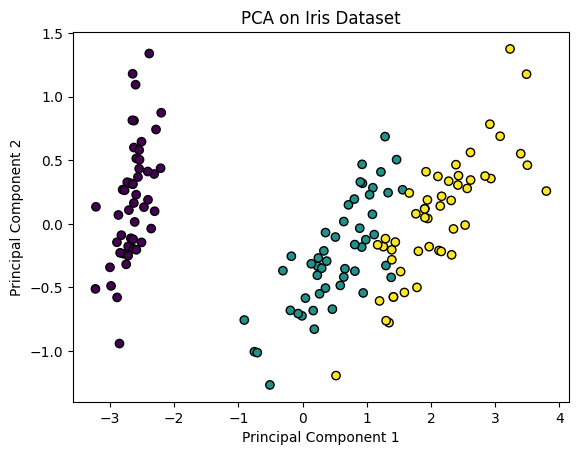

In [314]:
# Charger le jeu de données Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# ACP pour visualiser les données en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.show()

Nous observons qu'il y a exactement 3 clusters, ayant chacun une tendance de dispersion assez linéaire, et dont 2 sont assez proches l'un de l'autre. Voyons donc maintenant ce que les différentes méthodes de clustering donnent comme résultats.

Voici une visualisation des différents clustering :

Convergence atteinte à l'itération 6
Convergence atteinte à l'itération 10


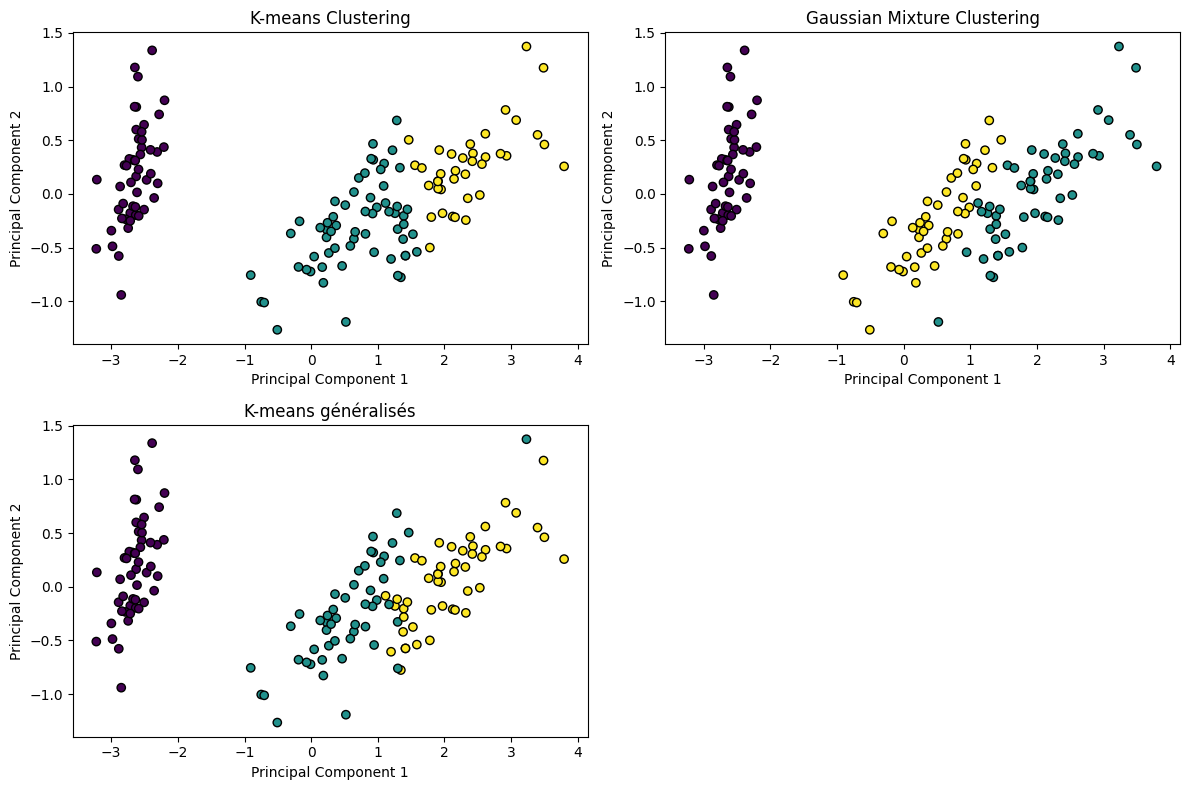

In [317]:
# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Appliquer l'algorithme de mélange gaussien
gmm = GaussianMixture(n_components=3)
gmm_labels = gmm.fit_predict(X)

# Appliquer l'algorithme des k-means généralisés 10 fois et choisir le résultat avec le moins d'erreur
K = 3
liste_representants = []
liste_classes = []
for i in range(10):
    representants, classes = kmeans_generalises([Point(coord) for coord in X], K, max_iterations=100)
    liste_representants.append(representants)
    liste_classes.append(classes)
representants = liste_representants[np.argmin([np.sum(np.abs(classes - y)) for classes in liste_classes])]
classes = liste_classes[np.argmin([np.sum(np.abs(classes - y)) for classes in liste_classes])]


# Comparaison des méthodes
# Tracer les points avec les couleurs des clusters attribuées par K-means
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Tracer les points avec les couleurs des clusters attribuées par le mélange gaussien
plt.subplot(2, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k')
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Tracer les points avec les couleurs des clusters attribuées par K-means généralisés
plt.subplot(2, 2, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=classes, cmap='viridis', edgecolor='k')
plt.title('K-means généralisés')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

Et voici leur puissance prédictive respective :

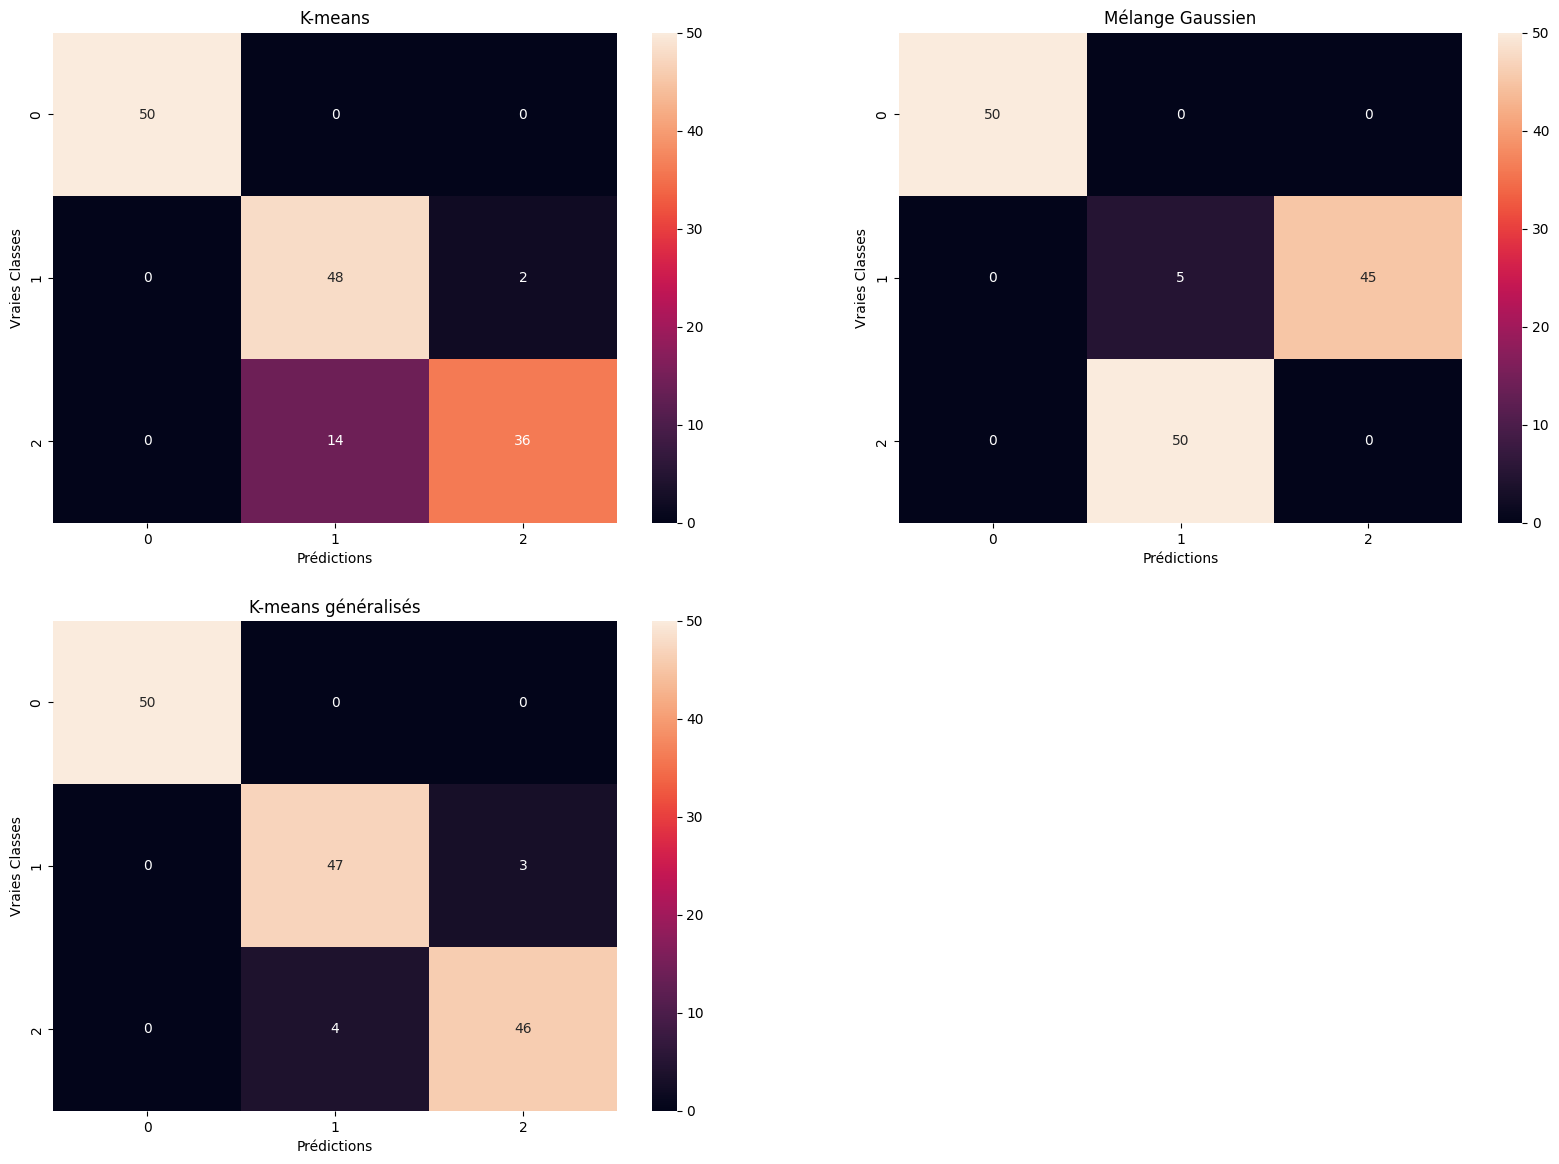

In [318]:
# Calculer la matrice de confusion
matrice_confusion_kmeans = confusion_matrix(iris.target, kmeans_labels)
matrice_confusion_gmm = confusion_matrix(iris.target, gmm_labels)
matrice_confusion_kmeans_generalises = confusion_matrix(iris.target, classes)


plt.figure(figsize=(20, 14))

plt.subplot(2, 2, 1)
sns.heatmap(matrice_confusion_kmeans, annot=True, fmt="d")
plt.title('K-means')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')

plt.subplot(2, 2, 2)
sns.heatmap(matrice_confusion_gmm, annot=True, fmt="d")
plt.title('Mélange Gaussien')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')

plt.subplot(2, 2, 3)
sns.heatmap(matrice_confusion_kmeans_generalises, annot=True, fmt="d")
plt.title('K-means généralisés')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')

plt.show()

On observe donc que les deux versions des K-means sont assez précises, environ 90% pour le classique, et 94% pour le généralisé.

Cependant, le modèle de mélange gaussien est beaucoup plus précis, puisque seulement 5 fleurs sont mal classées, soit une précision de 96,6% !

Ceci pourrait s'expliquer par le fait que les algorithmes de K-means sont très sensibles à l'initialisation des clusters, qui sont déterminants.